# Yandex Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension. 

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * reset - True / False boolean to reset starting w values, relevant in gradient descent OlsCd and OlsGd. Usually its reseted to 0's
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from scipy import stats

#from sklearn.datasets import load_boston
sns.set()

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data.shape, target.shape
X, y = data, target
# 506 - number of samples, i.e. N
# 13 - number of features, i.e. p

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)
#y_train.shape, y_test.shape, X_test.shape, X_train.shape


In [2]:
# import warnings
# from sklearn.datasets import load_boston
# with warnings.catch_warnings():
#      # You should probably not use this dataset.
#   warnings.filterwarnings("ignore")
# X, y = load_boston(return_X_y=True)
# print(X.shape)

In [3]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? 
#hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

class Ols(object):
  def __init__(self):
    self.w = None
    #self.X = None
   # self.y = None
    
  @staticmethod
  def pad(X):
    return np.c_[np.ones(X.shape[0]), X]
  
  def fit(self, X, y):
    #remeber pad with 1 before fitting
    X = self.pad(X)    
    self.w = np.linalg.pinv(X) @ y
    self._fit(X, y)
    
  
  def _fit(self, X, y):
    # optional to use this
    pass
    #np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
    
    
  def predict(self, X):
    #return wx 
    return self._predict(X)

  def _predict(self, X):
    if X.shape[1] != self.w.shape[0]:
      X_pad = self.pad(X)
    else:
      X_pad = X
    y_pred = X_pad.dot(self.w)
    return y_pred

  def score(self, X, y):
    #return MSE
    return self._score(X, y)

  def _score(self, X, y):
    y_predict = self.predict(X)
    return (1 / X.shape[0]) * np.sum(np.power((y_predict - y), 2))


21.894831181729202


Text(0, 0.5, 'Predicted Y')

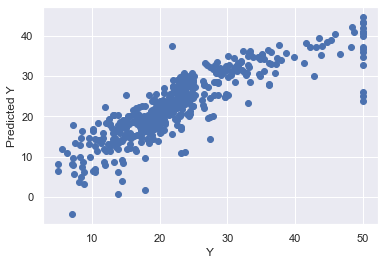

In [4]:
lr = Ols()
lr.fit(X,y)

y_pred = lr.predict(X)
print(lr.score(X, y))
plt.scatter(y,y_pred)
plt.xlabel('Y')
plt.ylabel('Predicted Y')

In [5]:
lr.score(X,y)

21.894831181729202

In [6]:
np.power(y - y_pred, 2).sum()/506

21.894831181729202

Text(0, 0.5, 'Predicted Y')

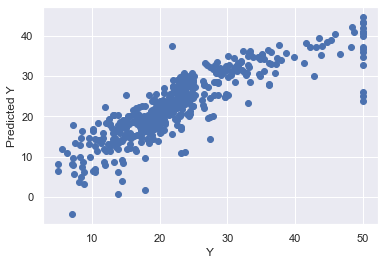

In [7]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X,y)
lr1.coef_
y_pred1 = lr.predict(X)

plt.scatter(y,y_pred1)
plt.xlabel('Y')
plt.ylabel('Predicted Y')

In [8]:
lr1.coef_, lr.w
lr1.score(X, y), lr.score(X,y)


(0.7406426641094095, 21.894831181729202)

In [9]:
np.power(y - y_pred1, 2).sum()/506

21.894831181729202

Mean train error =  22.224972181663517 Mean test error =  21.850244539439146
P-value: Ttest_relResult(statistic=0.3791836315089393, pvalue=0.7087559645892202)


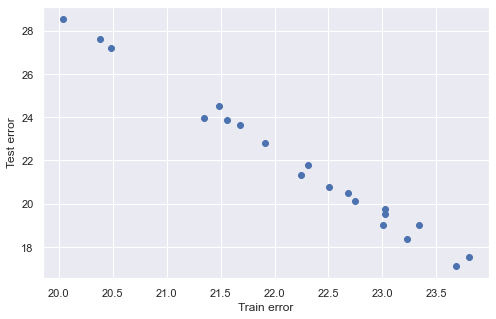

Mean train error =  21.78178939842742 Mean test error =  23.339557627178735
P-value: Ttest_relResult(statistic=-2.192289291340635, pvalue=0.03070169014708065)


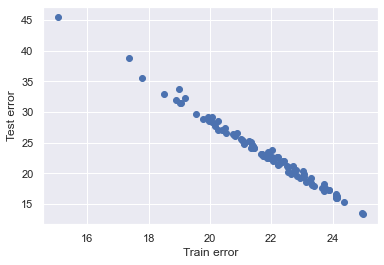

In [10]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error
from scipy import stats

plt.figure(figsize=(8,5))

def check_means(n_splits, X, y):

  # First subplot
  err_train = []
  err_test = []

    #ax1 = plt.subplot(1, 1, i)
  # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=142)
  rs = ShuffleSplit(n_splits=n_splits, test_size=.25)
  #, random_state=0

  for train_index, test_index in rs.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    LR = Ols()
    LR.fit(X_train, y_train)
    y_train_pred = LR.predict(X_train)
    y_test_pred = LR.predict(X_test)
    err_train.append(LR.score(X_train, y_train))
    #mean_train1.append(mean_squared_error(y_train, y_train_pred))
    #mean_test1.append(mean_squared_error(y_test, y_test_pred))    
    err_test.append(LR.score(X_test, y_test))
  
  return err_train, err_test, np.mean(err_train), np.mean(err_test)

err_train20, err_test20, mean_train20, mean_test20  = check_means(20, X, y)

plt.scatter(err_train20, err_test20)
plt.xlabel('Train error')
plt.ylabel('Test error')
#print('Train errors=', mean_train20)
#print('Test errors=', mean_test20)
print('Mean train error = ', mean_train20, 'Mean test error = ', mean_test20)
print('P-value:', stats.ttest_rel(err_train20, err_test20))
plt.show()

err_train100, err_test100, mean_train100, mean_test100  = check_means(100, X, y)
plt.scatter(err_train100, err_test100)
plt.xlabel('Train error')
plt.ylabel('Test error')
#print('Train errors=', mean_train100)
#print('Test errors=', mean_test100)
print('Mean train error = ', mean_train100, 'Mean test error = ', mean_test100)
print('P-value:', stats.ttest_rel(err_train100, err_test100))
plt.show()

The result shows that training error is lower than the test error. But on 20 loops it is significant only on 90% level. If we run the same test 100 times we will get significant difference.

In [11]:
#X_train.shape, X_test.shape, y_train.shape, y_test.shape
#y_test_pred.shape
#LR.predict(X_test).shape

In [17]:
# Write a new class OlsGd which solves the problem using gradinet descent. 
# The class should get as a parameter the learning rate and number of iteration. 
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate? 
# How would you find number of iteration automatically? 
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
class Normalizer():
  def __init__(self):
    self.min = min
    self.max = max

  def fit(self, X):
    self.X = X
    self.max = np.max(self.X, axis=0)    
    self.min = np.min(self.X, axis=0)
    #print(self.min, '\n', self.max)

  def normalize(self, X):
    #apply normalization
    #mean = np.mean(self.X, axis=0)
    #sigma = np.std(self.X, axis=0)
    return (self.X - self.min) / (self.max - self.min)
    
class OlsGd(Ols):
  
  def __init__(self, learning_rate=.05, 
               num_iteration=1000, 
               normalize=True,
               early_stop=True,
               verbose=True,
               epsilon = 0.01):
    
    super(OlsGd, self).__init__() # instantiating of parent class init()
    self.learning_rate = learning_rate
    self.num_iteration = num_iteration
    self.early_stop = early_stop
    self.normalize = normalize
    self.normalizer = Normalizer()
    self.verbose = verbose
    self.epsilon = epsilon
    
    
    
  def _fit(self, X, Y, reset=True, track_loss=True):
    self.mse = []
    #remember to normalize the data before starting
    # X = X [:, 1:]  this can be used with following pad again
    if self.normalize:
      self.normalizer.fit(X)
      X = self.normalizer.normalize(X)
      X[:, 0] = 1  #since X already initialized and padded with 1 in parent class we have to restore 1s instead of nan (division by 0)
    # X = Ols.pad(X)  #this can be used if we delete nan rows after normalization
    #print(X.shape, Y.shape, '\n', X)
    self.w = np.random.random(size=X.shape[1])      #np.linalg.pinv(X) @ Y
    #print(self.w)
    for i in range(self.num_iteration):
      y_pred = X @ self.w
      #self.predict(X)
      #Calculating derivatives of Parameters
      D_w = self._step(X, Y)
      #D_w = 2 * np.dot(X.T, (y_pred - Y)) / X.shape[0]
      #Updating Parameters
      self.w = self.w - self.learning_rate * D_w
      loss = self.score(X, Y)
      #(1 / X.shape[0]) * np.sum(np.power((y_pred - Y), 2))
      self.mse.append(loss)
      # check fo early break:
      if len(self.mse) > 1 and (self.mse[-2] - self.mse[-1]) < self.epsilon:
        print(f'Fast convergence! Step {i}')
        break


  def _predict(self, X):
    #remeber to normalize the data before starting
    if self.normalize:
      self.normalizer.fit(X)
      X = self.normalizer.normalize(X)
    if X.shape[1] != self.w.shape[0]:
      X = self.pad(X)
    else:
      X[:, 0] = 1
    y_pred = X.dot(self.w)
    return y_pred    
    #return X.dot(self.w)
    #super().predict(X)
    #return self.predict(X)
      
  def _step(self, X, Y):
    # use w update for gradient descent
    y_pred = self.predict(X)         
    D_w = 2 * np.dot(X.T, (y_pred - Y)) / X.shape[0]
    return D_w

  def _score(self, X, Y):
    return (1 / X.shape[0]) * np.sum(np.power((self.predict(X) - Y), 2))


C:\Anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


Fast convergence! Step 511
25.575102907500114
Fast convergence! Step 488
Predicted values  [23.52 19.94 28.85 12.32 20.15 19.01 17.32 20.82 15.2  14.89  5.53 10.85
 16.32  6.35 38.56 32.73 19.27 37.48 27.3  20.87 23.43 22.34 18.58 27.39
 20.52  3.98 18.14 18.74 33.6  20.02 16.6  17.55 22.4  24.27 26.43 19.41
 12.44 21.78 11.69 12.91 23.6  19.48 22.08 12.88 25.51 24.77 20.   25.35
 12.91 22.76 20.73 15.84 22.12 32.37 12.04 21.85 21.43 18.23  9.27 22.65
 22.73 20.97 30.51 26.75 15.26 30.   18.38 22.93 14.95 20.09 20.79 21.54
 29.79 29.54 22.64  6.29 34.53 22.28 24.98 18.43 27.71 18.59 15.65 34.94
 36.69 22.77 22.76  8.58 27.21 15.68 19.   11.29 27.62 32.54 20.65 21.77
  0.86 28.94 11.69 19.58 22.64 21.  ]
Real values       [22.6 50.  23.   8.3 21.2 19.9 20.6 18.7 16.1 18.6  8.8 17.2 14.9 10.5
 50.  29.  23.  33.3 29.4 21.  23.8 19.1 20.4 29.1 19.3 23.1 19.6 19.4
 38.7 18.7 14.6 20.  20.5 20.1 23.6 16.8  5.6 50.  14.5 13.3 23.9 20.
 19.8 13.8 16.5 21.6 20.3 17.  11.8 27.5 15.6 23.1 24.3 4

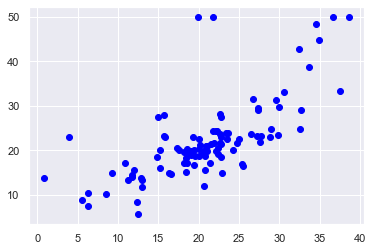

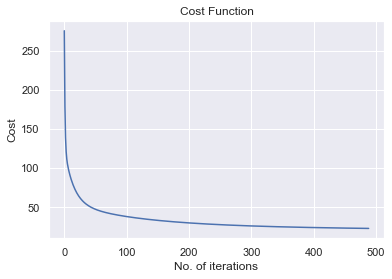

In [18]:
LR_G = OlsGd()
#LR_G.num_iteration
LR_G.fit(X, y)
y_pr = LR_G.predict(X)
print(LR_G.score(X,y))
 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )      
# Model training
model = OlsGd()
#num_iteration = 1000, learning_rate = 0.05 
model.fit(X_train, Y_train)
# Prediction on test set
Y_pred = model.predict(X_test)
print( "Predicted values ", np.round(Y_pred, 2)) 
print( "Real values      ", Y_test)
print( "Trained W        ", np.round(model.w, 2) )

# Visualization on test set 
      
#plt.scatter( X_test[:,0], Y_test, color = 'blue' )      
#plt.plot( X_test[:, 0], Y_pred, color = 'orange' )
plt.scatter( Y_pred, Y_test, color = 'blue' )      
plt.show()

plt.title('Cost Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(model.mse)
plt.show()


In [14]:
#y_pr, y.shape, Y_train.shape
#np.mean(LR_G.mse)
model.mse[-5:]

[23.03060423351543,
 23.020463281842733,
 23.010369853985473,
 23.000323660117225,
 22.990324412508954]

In [15]:
normalizer = Normalizer()
normalizer.fit(X)
X1 = normalizer.normalize(X)
print(LR_G.score(X1,y))

25.525466827989494


As number of iterations grows the MSE decreases. Obviously after approximately 400 iterations there is no much improvement in MSE. Ler's try to compare this function depending on LR

The above number of iterations is checked by fast convergence (with threshold equals to 0.01 the convergence was on 481 step.

C:\Anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


Fast convergence! Step 486
Fast convergence! Step 326
Fast convergence! Step 192
Fast convergence! Step 1


ValueError: x and y must have same first dimension, but have shapes (1000,) and (487,)

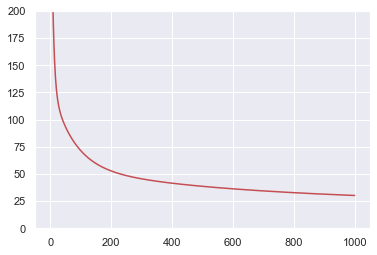

In [19]:
#rs = ShuffleSplit(n_splits=10, test_size=.2)
#, random_state=0
#for train_index, test_index in rs.split(X, y):
#X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
  
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )
mse_rate = {}
for rate in [0.01, 0.05, 0.1, 0.25, 0.5]:
  LR_GRID = OlsGd(learning_rate=rate)
  LR_GRID.fit(X_train, Y_train)
  y_train_pred = LR_GRID.predict(X_train)
  y_test_pred = LR_GRID.predict(X_test)
  mse_rate[rate] = LR_GRID.mse



# Visualization on test set 
      
#plt.scatter( X_test[:,0], Y_test, color = 'blue' )   
plt.ylim(0, 200)
plt.plot(np.arange(0, 1000), mse_rate[0.01], 'r-')
plt.plot(np.arange(0, 1000), mse_rate[0.05], 'b-')
plt.plot(np.arange(0, 1000), mse_rate[0.1], 'y-')
plt.plot(np.arange(0, 1000), mse_rate[0.25], 'g-')
plt.plot(np.arange(0, 1000), mse_rate[0.5], 'p')
plt.legend(mse_rate.keys())
plt.show()



The bigger the learning rate (out of our chosen samples) the faster gradient converges. The smaller it is the longer it takes to find the optima.

We can found the number of iterations automatically by using epsilon as a threshold to stop the loop. If the difference between current_loss and old_loss is smaller than our epsilon we can stop the iteration (confirmed above with eps=0.01)

## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation? 



In [20]:
class RidgeLs(Ols):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda
    
  def _fit(self, X, Y):
    #Closed form of ridge regression
    m,n = X.shape
    I = np.eye((n))
    return (np.linalg.inv(X.T @ X + self.ridge_lambda * I) @ X.T @ Y)


In [21]:
ridge_Ols = RidgeLs(ridge_lambda = 10)
ridge_Ols.fit(X,y)
mse = ridge_Ols.score(X,y)
# gradient_descent_model.predict(X)
print('mse for Ridge linear regression = %s' %(mse))

mse for Ridge linear regression = 21.894831181729202


MSE is the same as for written class

### Answer
First we'll rewrite the Ridge regression formula to matrix notation and further break it down: <br>
$L=(y-Xw)^{T}(y-Xw)+\lambda w^{T}w=y^{T}y-2w^{T}X^{T}y+w^{T}(X^{T}X+\lambda I)w$ <br>
Now we derive by w and use matrix differentiation rule $\frac{\partial x^{T}Ax}{\partial x} =(A+A^{T})x=2Ax $   (assuming symetric matrix A): <br>
$\frac{\partial L}{\partial w} =-2X^{T}y+2(X^{T}X+\lambda I)=0$ <br>
$(X^{T}X+\lambda I)w=X^{T}y$ <br>
$\Rightarrow w_{ridge}=(X^{T}X+\lambda I)^{-1}X^{T}y$

In [ ]:
#Use scikitlearn implementation for OLS, Ridge and Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ridge_regression
lr1 = LinearRegression()
lr1.fit(X,y)
lr1.coef_
y_pred1 = lr.predict(X)

plt.scatter(y,y_pred1)
plt.xlabel('Y')
plt.ylabel('Predicted Y')


lr_r = ridge_regression(X,y, alpha=0.01,  solver='lsqr')
#return_intercept=True,
print('Ridge Linear Regression coeff', lr_r)
print('SKlearn Linear Regression coeff', lr1.coef_)
print('Written Linear Regression coeff:', lr.w[1:])

In [ ]:

lr_r


In [ ]:
lr1.coef_